# Illustrations

``squishyplanet`` includes an illustration tool to help visualize the implications of different parameter choices. Below are a few examples of its output. See [OblateSystem.illustrate]([../oblate_system.html#oblate_system.OblateSystem.illustrate](https://squishyplanet.readthedocs.io/en/latest/oblate_system.html#oblate_system.OblateSystem.illustrate)) for more, and be sure to check out [Geometry Visualizations](https://squishyplanet.readthedocs.io/en/latest/geometry.html) for an overview of the parameters we'll fiddle with here.

In [1]:
import jax

jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import matplotlib.pyplot as plt

from squishyplanet import OblateSystem

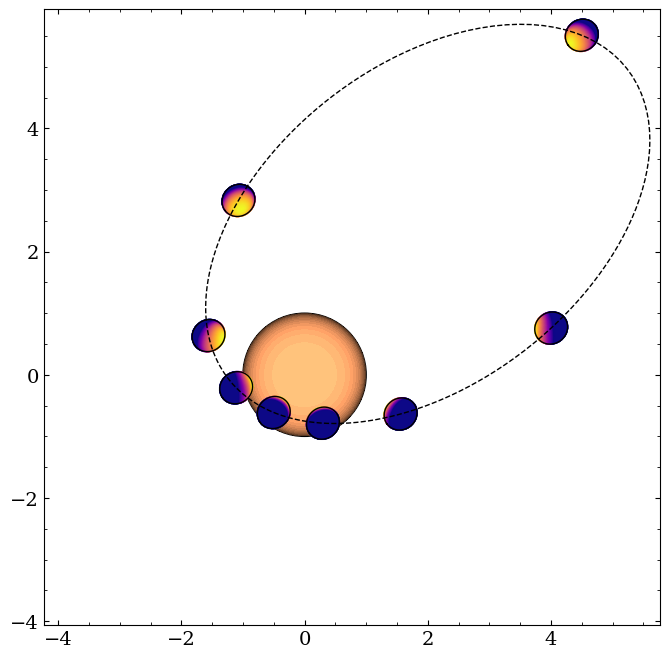

In [2]:
state = {
    "t_peri": 0.0,
    "times": jnp.linspace(0.0, 5, 400),
    "a": 5.0,
    "e": 0.8,
    "omega": jnp.pi / 3,
    "f1": 0.3,
    "f2": 0.1,
    "obliq": -jnp.pi / 2,
    "prec": jnp.pi / 4,
    "period": 10,
    "r": 0.3,
    "i": jnp.pi / 4,
    "ld_u_coeffs": jnp.array([0.2, 0.65]),
    "tidally_locked": False,
}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.arange(0, 2 * jnp.pi, jnp.pi / 4),
    window_size=10.0,
    reflected=True,
)

## Emitted Light

To start, let's make a (comically large) spherical planet with a hotspot on the north pole:

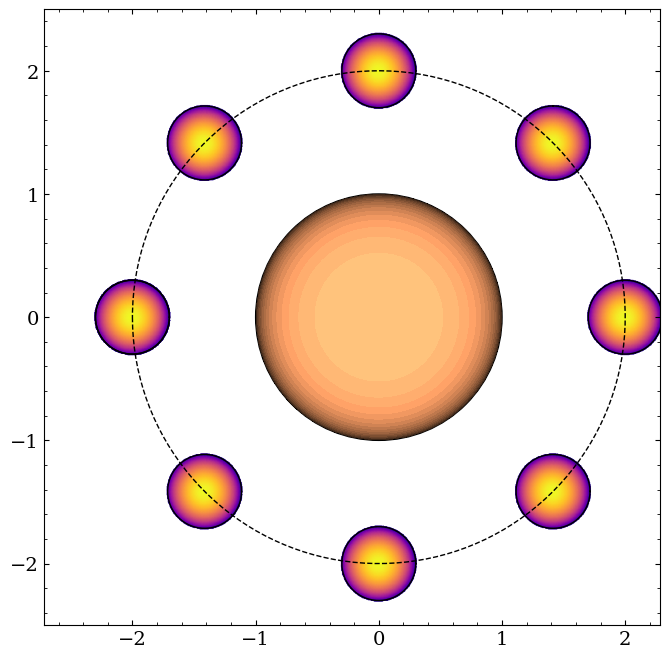

In [3]:
base = {
    "t_peri": 0.0,
    "times": jnp.linspace(0.0, 5, 400),
    "a": 2.0,
    "period": 10,
    "r": 0.3,
    "i": 0.0,
    "ld_u_coeffs": jnp.array([0.2, 0.65]),
}

state = {
    "hotspot_latitude": 0.0,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

Now let's flatten it along the z-axis by changing f1:

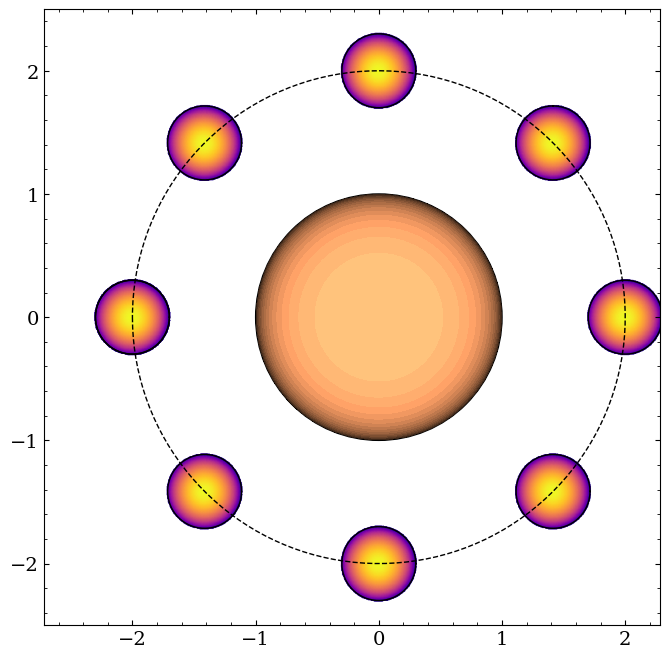

In [4]:
state = {
    "f1": 0.5,
    "hotspot_latitude": 0.0,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

It looks like nothing happened: why? Because we flattened using `f1`, which compresses along the planet's polar axis. Since the north pole is still facing us, the projected area of the planet is unchanged. Now let's rotate it by adding some obliquity:

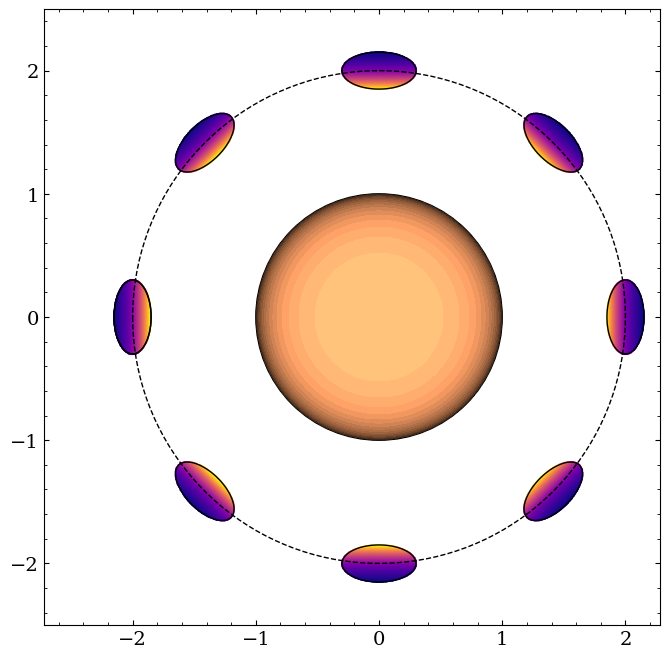

In [5]:
state = {
    "f1": 0.5,
    "obliq": -jnp.pi / 2,
    "hotspot_latitude": 0.0,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

Now it's more clear that we've squished the planet. The north pole is no longer facing us, so the projected area of the planet is smaller.

Note that there are many potential degeneracies here when we consider the total light seen by the observer. Consider these two scenarios: we could compress along `f2` and keep the hotspot at the north pole, or compress along `f1`, rotate the planet 90 degrees, then place the hotspot on the equator:

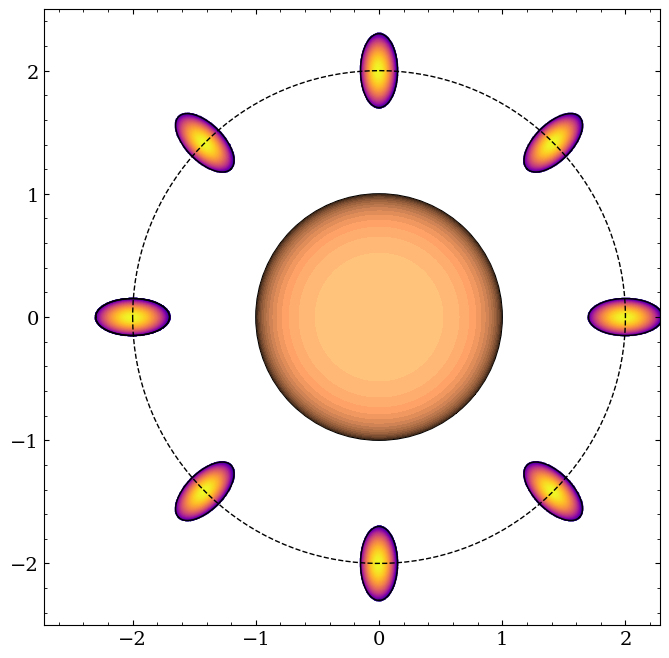

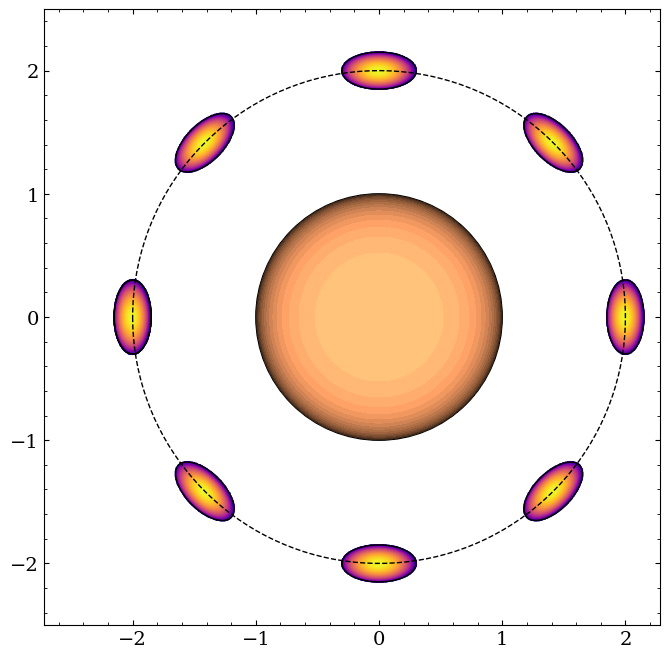

In [6]:
state = {
    "f2": 0.5,
    "hotspot_latitude": 0.0,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

state = {
    "f1": 0.5,
    "obliq": -jnp.pi / 2,
    "hotspot_latitude": jnp.pi / 2,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}

system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

These would create identical phase curves (actually these would both be boring/constant, since everything the orbital plane is lined up with the sky plane). In general, be careful about how you set up your priors to avoid these degeneracies.

Also, note the impact of setting ``tidally_locked`` to ``True``. Without this, the planet does not rotate about the axis parallel to z that runs through its center as it progresses on its orbit. The initial rotation of the planet about this (moving) axis is set by ``prec``, the "precession angle" of the planet. For example:

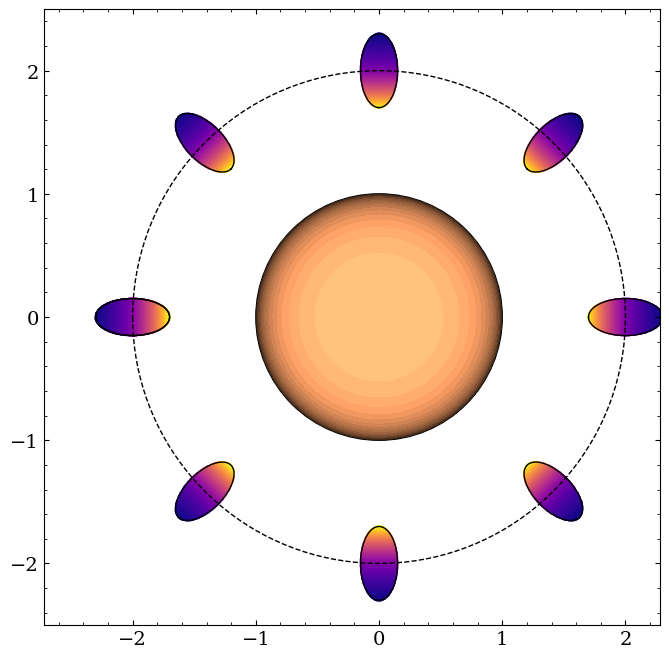

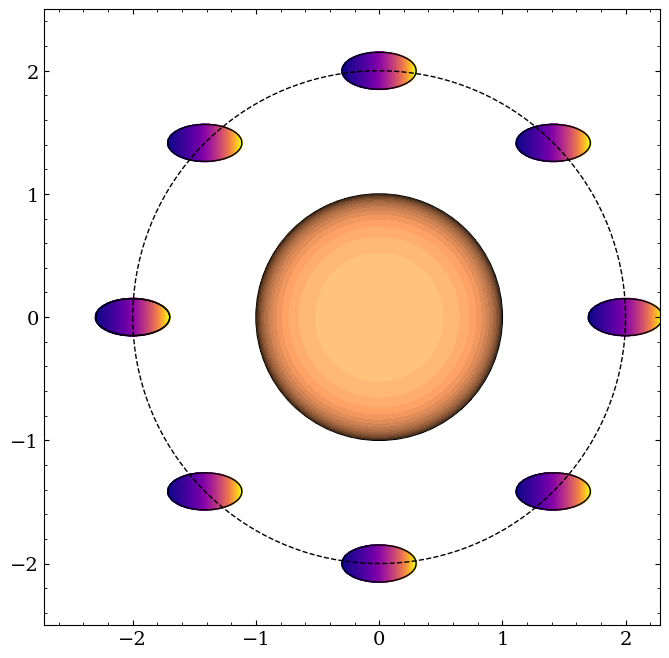

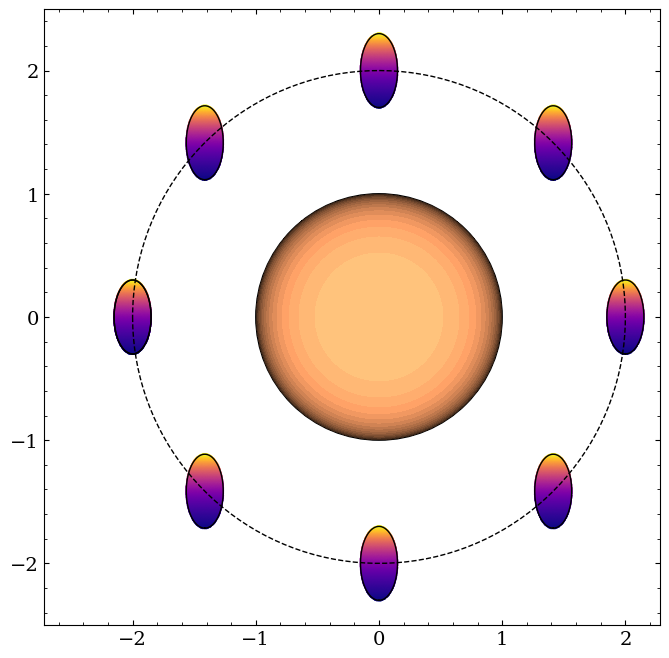

In [7]:
state = {
    "f2": 0.5,
    "obliq": -jnp.pi / 2,
    "hotspot_latitude": 0.0,
    "hotspot_longitude": 0.0,
    "hotspot_concentration": 1.0,
    "tidally_locked": True,
}

state = {**base, **state}
system = OblateSystem(**state)
system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

state["tidally_locked"] = False
system = OblateSystem(**state)
system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

state["prec"] = jnp.pi / 2
system = OblateSystem(**state)
system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    emitted=True,
)

Finally, note that although a user can have control the obliquity and precession of the planet, `squishyplanet` does not include the ability to rotate along the a third axis that would be necessary to place the planet in any arbitrary orientation. There are very few use cases where you would want this, however: a truly triaxial planet that's close enough to its host start to be streched by tidal forces almost certainly has its "nose" always pointing at the star, since any other orientation would be dynamically damped away. Further out planets that are only affected by an equitorial bulge (i.e. f1>0, f2=0) are axisymmetric, so we only need obliquity and precession to orient them in space.

## Reflected Light

Those illustrations all used emitted light with a hotspot, but we can visualize how the planet reflects light as well:

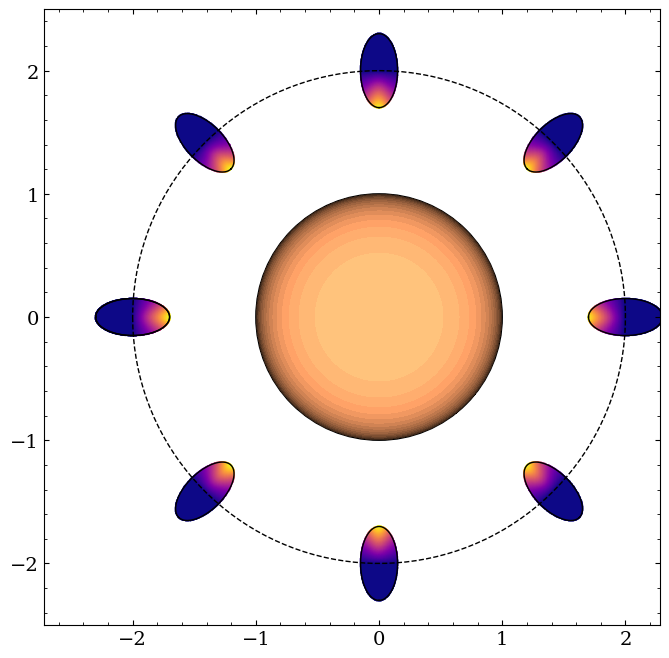

In [8]:
state = {
    "f2": 0.5,
    "obliq": -jnp.pi / 2,
    "tidally_locked": True,
}

state = {**base, **state}
system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    reflected=True, # instead of emitted
)

`squishyplanet` is only capable of modeling Lambertian reflections from planets with uniform albedos, but users can set/fit for that albedo.

Here's what the system looks like as we increase the inclination. Note that the projected area of a tidally locked planet changes over the course of the orbit, which imprints itself on the phase curves and transits.

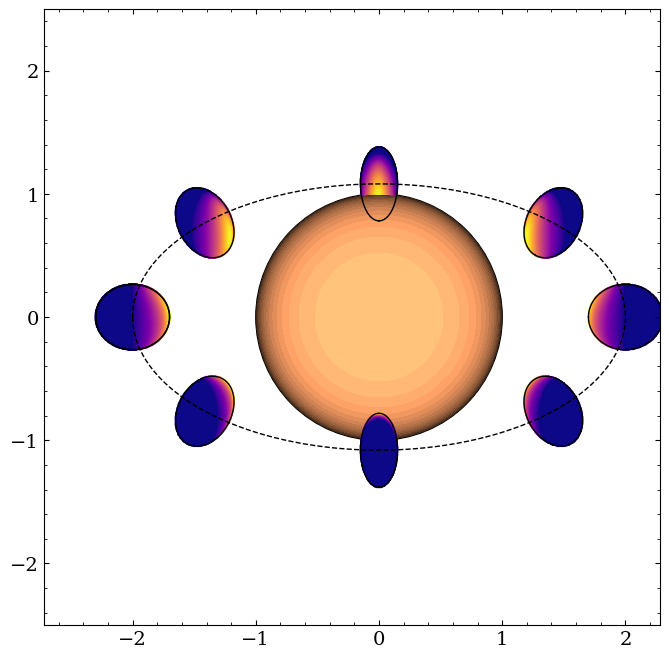

In [9]:
state = {
    "f2": 0.5,
    "obliq": -jnp.pi / 2,
    "tidally_locked": True,
}

state = {**base, **state}
state["i"] = 1.0
system = OblateSystem(**state)

system.illustrate(
    true_anomalies=jnp.linspace(0, 2 * jnp.pi, 9),
    window_size=5.0,
    reflected=True,
)

## Limb darkening profile check

``OblateSystem`` does not have many methods accessible to the user. Aside from ``lightcurve``, ``loglike``, and ``illustrate``, the remaining two are convenience methods to deal with limb darkening. One of these is ``limb_darkening_profile``, which is included to help visualize the limb darkening profile:

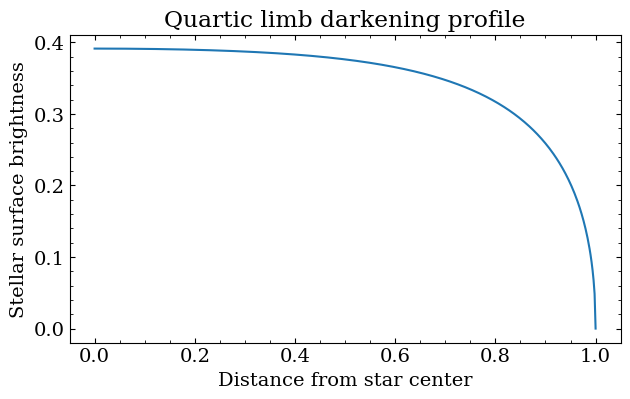

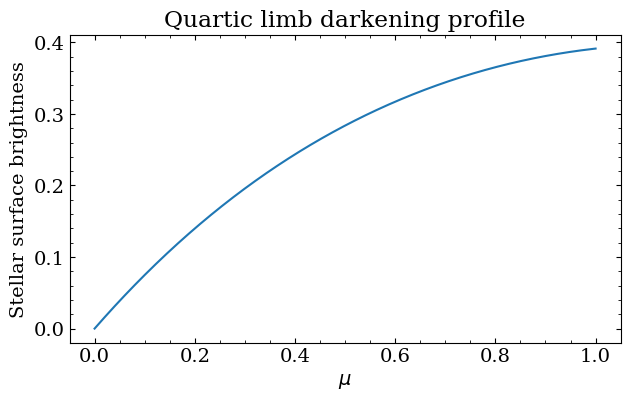

In [15]:
stellar_radii = jnp.linspace(0, 1, 500)
ld_profile = OblateSystem.limb_darkening_profile(ld_u_coeffs=jnp.array([0.2, 0.65, 0.05, 0.1]), r=stellar_radii)

fig, ax = plt.subplots()
ax.plot(radii, ld_profile)
ax.set(
    xlabel="Distance from star center",
    ylabel="Stellar surface brightness",
    title="Quartic limb darkening profile",
);

stellar_mu = jnp.linspace(0, 1, 500)
ld_profile = OblateSystem.limb_darkening_profile(ld_u_coeffs=jnp.array([0.2, 0.65, 0.05, 0.1]), mu=stellar_mu)

fig, ax = plt.subplots()
ax.plot(radii, ld_profile)
ax.set(
    xlabel="$\mu$",
    ylabel="Stellar surface brightness",
    title="Quartic limb darkening profile",
);

## Angle conventions

``squishyplanet`` follows the standard orbit orientation angles/conventions: 

![title](Orbit1.svg)

This diagram, and a good explanation for all the angles pictured, is from the [wikipedia page for orbital elements](https://en.wikipedia.org/wiki/Orbital_elements). We recommend bookmarking this page: chances are you'll be returning to it often if you think about orbits and modeling.

After an orbit is defined by its Keplerian elements, we orient it on the sky according to the rotations given in [Murray and Correia 2010](https://ui.adsabs.harvard.edu/abs/2010exop.book...15M/abstract). The observer is placed at [0,0,+$\infty$], and to transform from the planet's frame (subscript $p$) to the sky frame (subscript $s$), we apply the following rotations:

$$ \{x_s, y_s, z_s\}^T = P_z(\Omega) P_x(i) P_z(\omega) \,\,\, \{x_p, y_p, z_p\}^T $$

Where $P_x(*)$ is the rotation matrix about the x-axis and $P_z(*)$ is the rotation matrix about the z-axis. The angles $\Omega$, $i$, and $\omega$ are the longitude of the ascending node, inclination, and argument of periastron, respectively.

After this transformation, an inclination of $i=90^\circ$ gives us a transiting orbit, while $i=0^\circ$ gives us a face-on orbit:

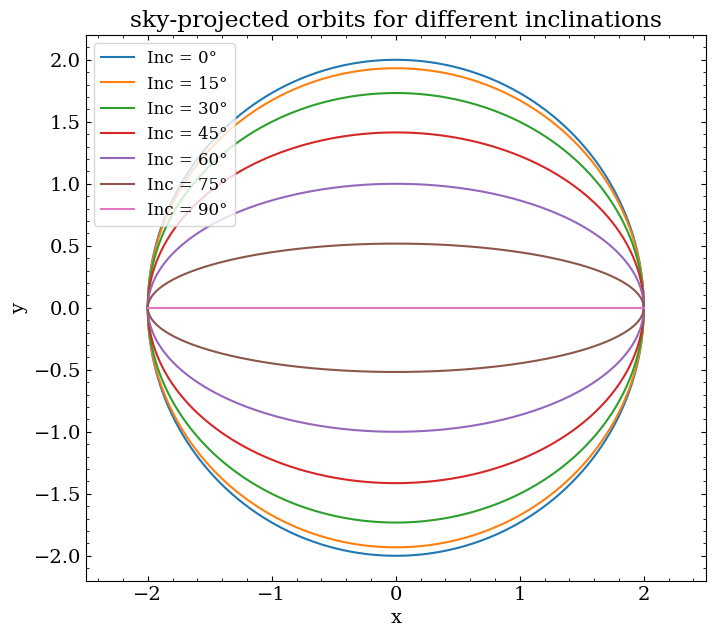

In [ ]:
# Inclination

base = {
    "t_peri": 0.0,
    "times": jnp.linspace(0.0, 5, 400),
    "a": 2.0,
    "period": 5,
    "r": 0.3,
    "i": 0.0,
    "ld_u_coeffs": jnp.array([0.0, 0.0]),
}
planet = OblateSystem(**base)

fig, ax = plt.subplots(figsize=(8, 8))
for inc in jnp.arange(0, 91, 15):
    base["i"] = jnp.deg2rad(inc)
    planet = OblateSystem(**base)
    x = planet.state["x_c"]
    y = planet.state["y_c"]

    ax.plot(x, y, label=f"Inc = {inc}°")
ax.set(
    xlabel="x",
    ylabel="y",
    title="sky-projected orbits for different inclinations",
    xlim=(-2.5, 2.5),
    aspect="equal",
)
ax.legend(prop={"size": 12})

We can also illustrate the effect of changing $\omega$ when you have an eccentric orbit:

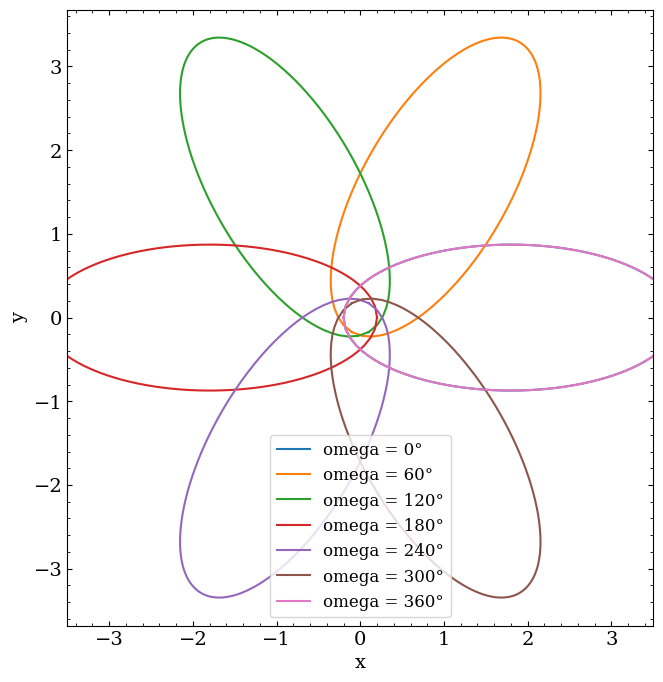

In [16]:
# little omega

# little omega is a rotation about the pole of the orbital plane. When inclination=0,
# the orbital planet *is* the sky plane, so little omega is just a rotation about Z

base = {
    "t_peri": 0.0,
    "times": jnp.linspace(0.0, 5, 400),
    "a": 2.0,
    "e": 0.9,
    "omega": 0.0,
    "period": 5,
    "r": 0.3,
    "i": 0.0,
    "ld_u_coeffs": jnp.array([0.0, 0.0]),
}
planet = OblateSystem(**base)

fig, ax = plt.subplots(figsize=(8, 8))
for omega in jnp.arange(0, 361, 60):
    base["omega"] = jnp.deg2rad(omega)
    planet = OblateSystem(**base)

    ax.plot(planet.state["x_c"], planet.state["y_c"], label=f"omega = {omega}°")

ax.set(xlabel="x", ylabel="y", xlim=(-3.5, 3.5), aspect="equal")

ax.legend(prop={"size": 12})

And finally, the effect of changing $\Omega$, which transits and RVs are insensitive to:

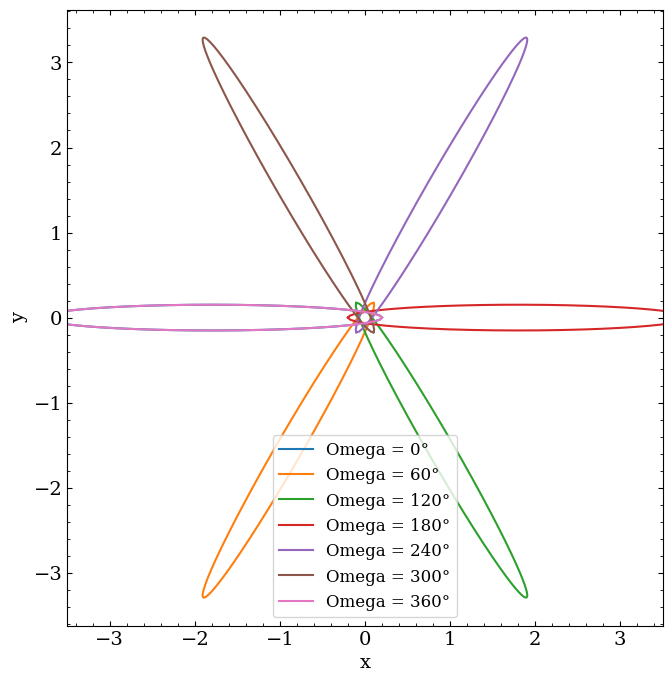

In [17]:
# big Omega- transits and RVs are not sensitive to this parameter,
# so by default we always set it to Pi. This ensures that a transiting planet moves
# left->right and reaches conjunction at true anomaly=pi/4 (if it's circular)

# still, it can be set to other values in squishyplanet
# here, we give each orbit some inclination but keep little omage fixed at 0, emphazing
# that big Omega is a rotation around the sky Z axis

base = {
    "t_peri": 0.0,
    "times": jnp.linspace(0.0, 5, 400),
    "a": 2.0,
    "e": 0.9,
    "omega": 0.0,
    "Omega": 0.0,
    "period": 5,
    "r": 0.3,
    "i": 80 * jnp.pi / 180,
    "ld_u_coeffs": jnp.array([0.0, 0.0]),
}
planet = OblateSystem(**base)

fig, ax = plt.subplots(figsize=(8, 8))
for Omega in jnp.arange(0, 361, 60):
    base["Omega"] = jnp.deg2rad(Omega)
    planet = OblateSystem(**base)

    ax.plot(planet.state["x_c"], planet.state["y_c"], label=f"Omega = {Omega}°")

ax.set(xlabel="x", ylabel="y", xlim=(-3.5, 3.5), aspect="equal")

ax.legend(prop={"size": 12})